# Face Recognition with Deep Learning (by face_recognition library)

This notebook is an example of Face Recognition algorithm. I will compare two images and the algorithm will return a result about these images are the same person or not. I will use 'face_recognition' for this purpose and try to explain each command. After this notebook, you will have an example face recognition code and know 'how it works'.

The reference links are at the end of notebook. For original codes and detailed explanation, you should check these links. I just collected all info from references and added some extra explanation for answering 'why we do that'.


As always we will load our packages. We will need Opencv and face_recognition. You can load these easily with pip install in your enviroment. I have to warn you for 'face_recognition needs dlib and if its is your first time probably you will have some problems while pip install dlib'. You may need to load Visual Studio and Cmake for solving these problem. They are out of concept of this notebook, but ı want to warn you beforehand.

Now let's try loading our packages..

In [3]:
import cv2
import face_recognition
import numpy as np
print('...PACKAGES ARE LOADED SUCCESFULLY...')

...PACKAGES ARE LOADED SUCCESFULLY...


The original page for face_recognition : https://github.com/ageitgey/face_recognition

We will load our images. Then we will convert them to RGB channel. Because Opencv uses BGR, but 'face_recognition' needs RGB.


In [6]:
#load the reference image and convert RGB
Ref_img = face_recognition.load_image_file(r'keanu.JPG')
Ref_img = cv2.cvtColor(Ref_img, cv2.COLOR_BGR2RGB)
#load the test image and convert RGB
Test_img = face_recognition.load_image_file(r'keanu3.JPG')
Test_img = cv2.cvtColor(Test_img, cv2.COLOR_BGR2RGB)


Be careful about the path of images... My images are in the same directory with my notebook. You may need to change path of image for your case.

First we should find faces on the images. You can use other face detection methods but for the simplicity here i use face_recognitions' face_locations() method

face_locations : Returns an array of bounding boxes of human faces in a image. 
it uses hog model for default to detect faces. you can use cnn. As you can guess, Cnn is more accurate but slower. it returns a list of tuples of found face locations in css (top, right, bottom, left) order.

In [11]:
face_Loc = face_recognition.face_locations(Ref_img)[0]
print(face_Loc)

(192, 340, 415, 117)


Let's what our we have...

In [15]:
cv2.rectangle(Ref_img, (face_Loc[3], face_Loc[0]), (face_Loc[1], face_Loc[2]), (255,180, 255), 2)
cv2.imshow('Face in Reference image',Ref_img)
cv2.waitKey(0)

-1

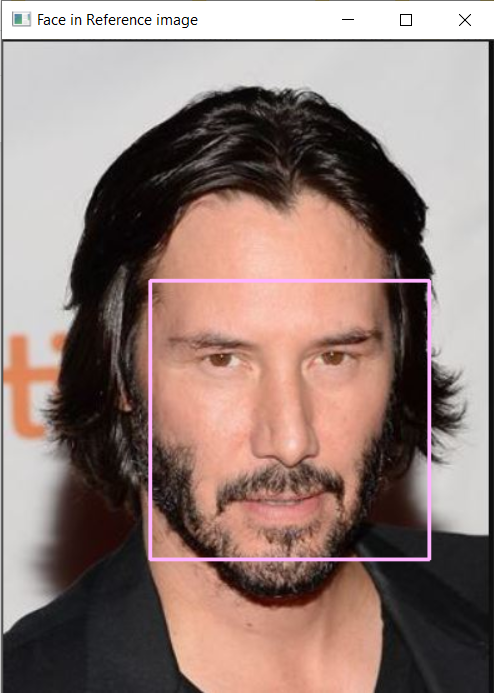

Why we need to find face, because our model will calculate a 128 dimensional data from that face to compare with other. the face_encoding() command will find face automaticly and calculate this 128 data. 

In [17]:
encodeRefer = face_recognition.face_encodings(Ref_img)[0]
print(encodeRefer)
# be careful about zero index.

[-5.38598523e-02  1.85529783e-01  1.18263915e-01 -2.15736758e-02
 -1.08251721e-01  2.03666780e-02 -8.37172568e-02 -7.20718727e-02
  1.94860980e-01 -4.35911454e-02  2.67889410e-01  5.77865355e-03
 -2.08052129e-01 -6.22830726e-02  3.83892804e-02  1.46897525e-01
 -1.40604943e-01 -5.01607843e-02 -1.00613162e-01 -1.00846499e-01
  3.02002281e-02  8.22876394e-02  3.98359112e-02 -2.60597710e-02
 -1.47688940e-01 -3.29399765e-01 -9.42887645e-03 -1.38276041e-01
  6.20128214e-02 -1.45430803e-01 -4.72264662e-02  4.26545367e-03
 -1.37624294e-01 -4.93329018e-02 -2.20809281e-02 -2.34003793e-02
 -6.65271580e-02 -1.29726335e-01  1.60579816e-01 -5.43995202e-02
 -1.64578944e-01 -1.30859641e-02  2.62481179e-02  1.53960750e-01
  2.11493999e-01 -6.48536235e-02  6.55103624e-02 -1.52409315e-01
  1.41345203e-01 -1.91734940e-01  7.13940188e-02  1.31653860e-01
  2.76863426e-02  1.12678722e-01  1.23642422e-01 -1.62214220e-01
  5.00820577e-04  1.01981089e-01 -1.89641565e-01  3.41803394e-02
  8.80190209e-02  3.45347

In [18]:
print(len(encodeRefer))

128


We have 128 data for our reference image.

You may ask 'how did we find these 128 dim encodings?'. The answer is the network architecture for face recognition is based on ResNet-34.  This model has already been trained to create 128-d embeddings on a dataset of about 3 million images. For more details, you can check : https://github.com/davisking/dlib-models 

Let's apply same process for our test image

In [19]:
face_LocTest = face_recognition.face_locations(Test_img)[0]
encodeTest = face_recognition.face_encodings(Test_img)[0]
cv2.rectangle(Test_img, (face_LocTest[3], face_LocTest[0]), (face_LocTest[1], face_LocTest[2]), (255, 180, 255), 2)
cv2.imshow('Face in Test image',Test_img)
cv2.waitKey(0)

-1

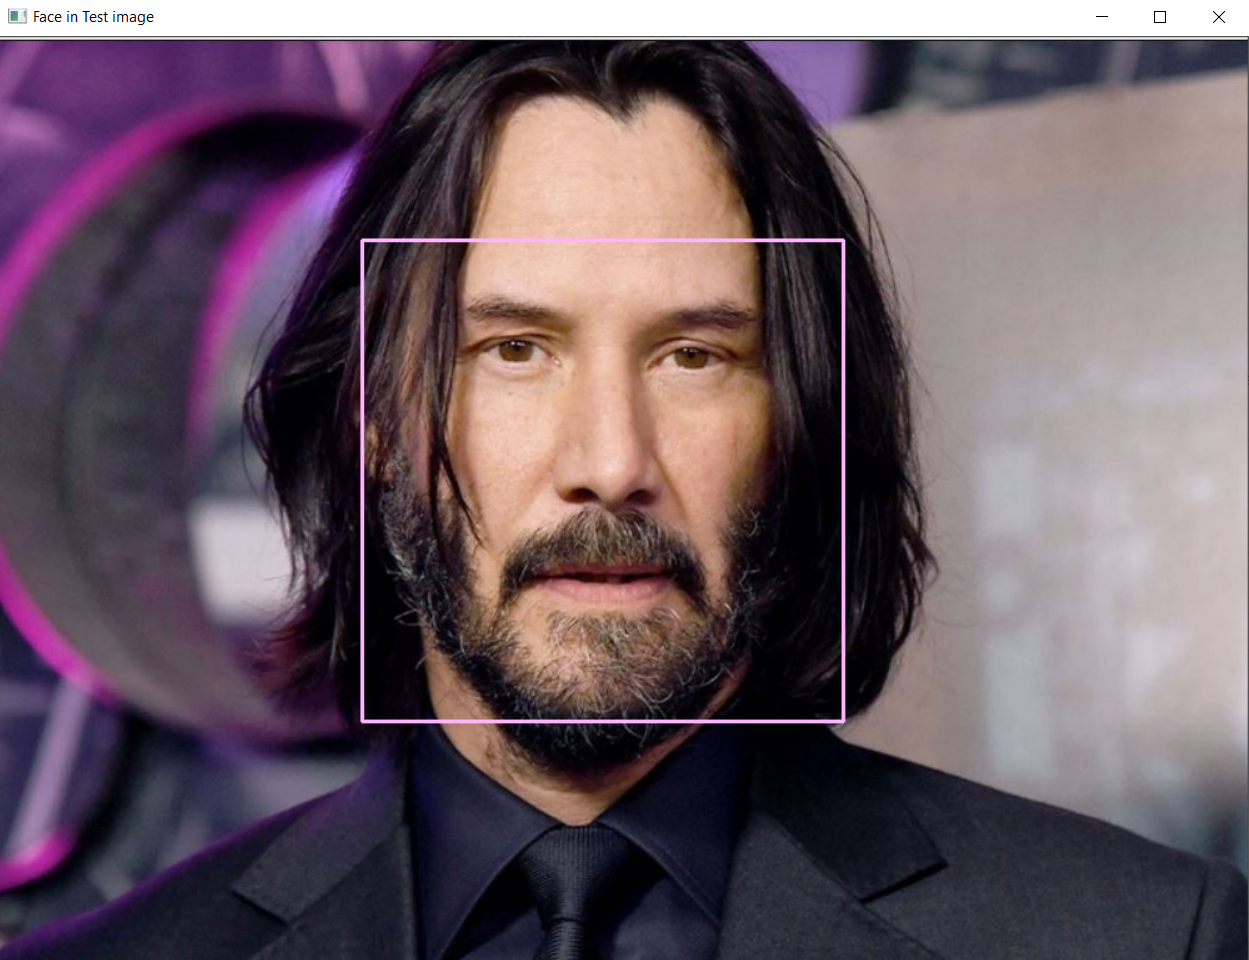

In [20]:
print(encodeTest)

[-1.09407239e-01  1.79827943e-01  1.08836308e-01 -5.23150228e-02
 -1.19549118e-01  1.09200086e-02  1.96052231e-02 -7.22451583e-02
  1.72843009e-01 -1.96400974e-02  2.58861363e-01 -1.41991377e-02
 -2.37008661e-01 -5.70949502e-02  7.62236863e-02  1.22299552e-01
 -1.51384622e-01 -6.44138083e-02 -1.04503959e-01 -8.84820446e-02
  1.79880448e-02  7.26647303e-02  7.19764903e-02  5.34907132e-02
 -1.06091961e-01 -3.76546770e-01 -4.27659675e-02 -1.47627294e-01
  1.14074647e-01 -1.18467174e-01 -2.89307646e-02 -2.00435016e-02
 -1.88118011e-01 -7.54703581e-02 -1.80067718e-02  3.38286646e-02
 -1.49869740e-01 -1.43704444e-01  1.51546255e-01 -6.61738366e-02
 -1.85424238e-01 -1.62307024e-02  2.50218287e-02  1.82138279e-01
  2.19069064e-01 -2.11402159e-02  6.58917949e-02 -1.34373114e-01
  1.15226686e-01 -1.87187448e-01  1.34548217e-01  1.13251008e-01
  6.53236881e-02  1.19777657e-01  1.43942177e-01 -1.66990399e-01
  7.72263855e-04  9.07732919e-02 -2.09237307e-01  2.32693274e-05
  7.89662227e-02  8.40455

In [21]:
print(len(encodeTest))

128


We have 128 face encodings data for both of faces. How we will compare them?? The face_recognition has two commands for this purpose. One of them is compare_faces(). It takes encodings as input, compares them and returns a boolean result.

YOu may ask 'how does compare_faces decide true or false'. It uses euclidean distance for each comparison face by face_distance() method. The distance tells you how similar the faces are. 0.6 is the default threshold value for compare_faces. Lower is more strict.

In [22]:
results = face_recognition.compare_faces([encodeRefer], encodeTest)
#face_distance show the difference of faces and smaller better.
faceDis = face_recognition.face_distance([encodeRefer], encodeTest)



In [23]:
print(faceDis)
print(results)

[0.37266675]
[True]


In my case, the distance is about 0.37 and it is smaller than the threshold value. So The algorithm will tell 'these two images are same person'

In [24]:
cv2.putText(Test_img, f'{results} {round(faceDis[0], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

cv2.imshow('REFERENCE_IMAGE', Ref_img)
cv2.imshow('TEST_IMAGE', Test_img)
cv2.waitKey(0)

-1

For test purpose, let's take two beautiful ladies' images and try again.

In [25]:
#load the reference image and convert RGB
Ref_img = face_recognition.load_image_file(r'cate.JPG')
Ref_img = cv2.cvtColor(Ref_img, cv2.COLOR_BGR2RGB)
#load the test image and convert RGB
Test_img = face_recognition.load_image_file(r'scarlett.JPG')
Test_img = cv2.cvtColor(Test_img, cv2.COLOR_BGR2RGB)
face_Loc = face_recognition.face_locations(Ref_img)[0]
print(face_Loc)
encodeRefer = face_recognition.face_encodings(Ref_img)[0]
print(encodeRefer)
face_LocTest = face_recognition.face_locations(Test_img)[0]
encodeTest = face_recognition.face_encodings(Test_img)[0]
print(encodeTest)
results = face_recognition.compare_faces([encodeRefer], encodeTest)
#face_distance show the difference of faces and smaller better.
faceDis = face_recognition.face_distance([encodeRefer], encodeTest)
print(faceDis)
print(results)
cv2.putText(Test_img, f'{results} {round(faceDis[0], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

cv2.imshow('REFERENCE_IMAGE', Ref_img)
cv2.imshow('TEST_IMAGE', Test_img)
cv2.waitKey(0)

(167, 365, 390, 142)
[-0.15256834  0.20300411  0.13951124 -0.09474659 -0.13420928 -0.03742034
 -0.07294238 -0.15287939  0.25927061 -0.15892321  0.13880448  0.05787482
 -0.30790353  0.02098257 -0.08724155  0.18920992 -0.22252673 -0.18144909
 -0.10851859 -0.10653067  0.01713077  0.08458246 -0.00172765  0.06137166
 -0.02623078 -0.26544145 -0.01887002 -0.06395451 -0.00135181 -0.12344303
  0.01965864  0.07179753 -0.0930426  -0.00736048 -0.00995255  0.10694154
 -0.04514232 -0.0983977   0.1393276  -0.00841002 -0.24836743 -0.05899144
  0.04502364  0.22881994  0.29380479  0.000709   -0.01043212 -0.17301832
  0.13968375 -0.342695    0.0866059   0.22588524  0.03608998  0.12835705
  0.11628757 -0.28909394  0.01721731  0.15109636 -0.16928367  0.05290584
  0.11921123 -0.14590044  0.02921977 -0.02600006  0.13788472  0.16978574
 -0.09402934 -0.18216626  0.20398654 -0.22031042 -0.10978707  0.1186576
 -0.12125676 -0.19182467 -0.20825484 -0.02252154  0.3724077   0.26772612
 -0.09395561 -0.02383074 -0.113

-1

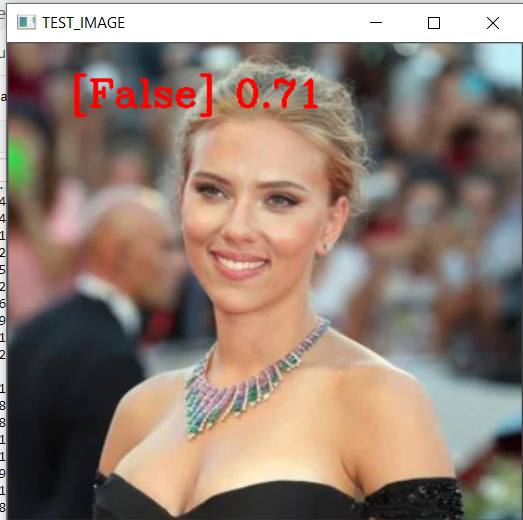


As you can see , model calculated the distance between face encodings. Because of the distance is bigger than the threshold value, It returns 'false'.

This notebook is a basic example for face recognition with deep learning model. By checking the reference links, you can change the parameters of methods(result threshold,face detection model etc.) and see how your model response. I hope you find answers to 'why' and 'how' questions about this technique .

REFERENCE LINKS :

* https://github.com/ageitgey/face_recognition
* https://github.com/davisking/dlib-models
* https://www.youtube.com/watch?v=sz25xxF_AVE&ab_channel=Murtaza%27sWorkshop-RoboticsandAI